In [12]:
import os, sys
import rasterio
from rasterio.crs import CRS
import numpy as np
import matplotlib.pyplot as plt
import geemap
import ee

In [3]:
try:
    # Initialize the library.
    ee.Initialize()
    print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
    print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Google Earth Engine has initialized successfully!


In [4]:
AHN3 = rasterio.open("./data/R_34FN2.tif")
print(AHN3.count)
print(AHN3.shape)
print(AHN3.height)
print(AHN3.width)
print(AHN3.bounds)

1
(12500, 10000)
12500
10000
BoundingBox(left=255000.0, bottom=468750.0, right=260000.0, top=475000.0)


In [8]:
band1 = AHN3.read(1)

center_x = int(AHN3.width / 2)
center_y = int(AHN3.height / 2)
start_x = center_x - int(1000 / 2)
start_y = center_y - int(1000 / 2)
subset = band1[start_y:start_y + 1000, start_x:start_x + 1000]

median_height = np.median(subset)
print(median_height)

39.0623


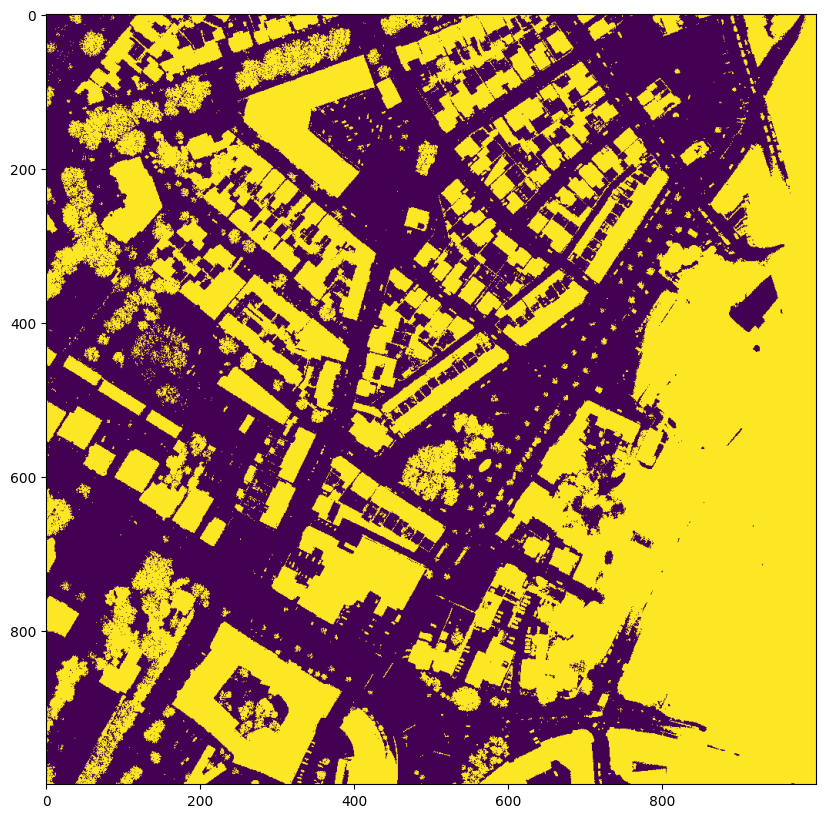

In [11]:
mask = subset > median_height
plt.figure(figsize=(10, 10))
plt.imshow(mask)
plt.show()